In [20]:
import torch
import torchvision.transforms as transform
import torch.nn as nn
import torch.nn.functional as F
import os
import pandas as pd
import torchvision
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import sys
import torch.optim as optim
import numpy as np
import wandb
from torchsummary import summary
import hiddenlayer as hl
import sys

In [21]:
class EmbeddingNet(nn.Module):
    def __init__(self):
        super(EmbeddingNet, self).__init__()
        # Change for one channel instead of 3 if input is grayscale
        self.convnet = nn.Sequential(nn.Conv2d(3, 32, 5), nn.PReLU(),
                                     nn.MaxPool2d(2, stride=2),
                                     nn.Conv2d(32, 64, 5), nn.PReLU(),
                                     nn.MaxPool2d(2, stride=2))

        self.fc = nn.Sequential(nn.Linear(179776, 256),
                                nn.PReLU(),
                                nn.Linear(256, 256),
                                nn.PReLU(),
                                nn.Linear(256, 2)
                                )

    def forward(self, x):
        output = self.convnet(x)
        output = output.view(output.size()[0], -1)
        output = self.fc(output)
        return output

    def get_embedding(self, x):
        return self.forward(x)
    

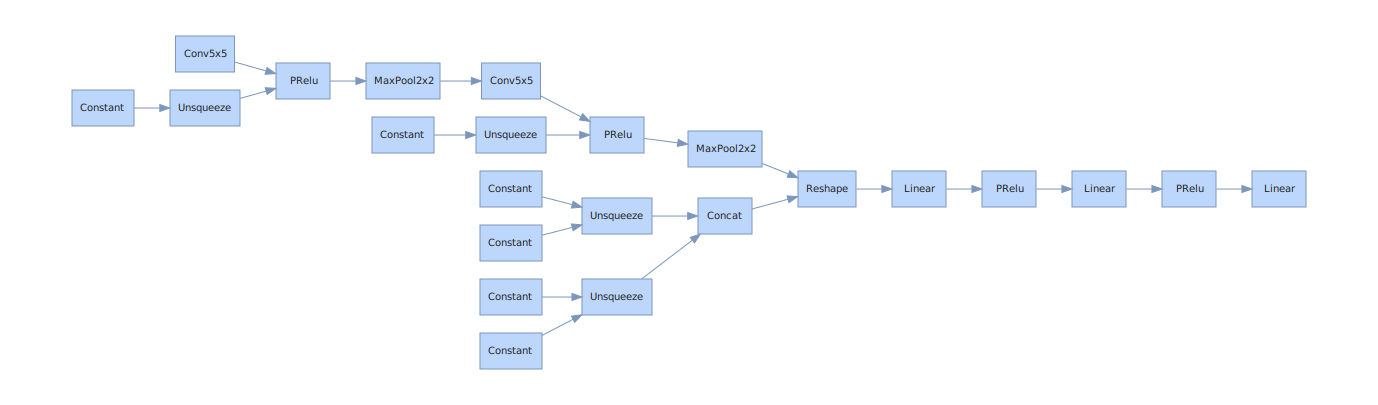

In [22]:
embedding_net = EmbeddingNet()

hl_graph = hl.build_graph(embedding_net, torch.zeros([1, 3, 224, 224]))
hl_graph.theme = hl.graph.THEMES['blue'].copy()
hl_graph.build_dot()